In [1]:
# Data Wrangling Workshop Chapter 7 Activities Program
# DSC 540
# Weeks 9 and 10
# Data Preparation Assignment Weeks 9 and 10
# David Berberena
# 5/19/2024

# Program Start

## Activity 7.01

In [2]:
# 1. Import the necessary libraries, including regex and BeautifulSoup.

# The libraries I will need to import will be bs4 (for BeautifulSoup access to parse HTML content), re (for regular 
# expression creation and implementation), pandas (for dataframe creation and data manipulation) and the requests library 
# (to request data from various sources like APIs and web pages). I will import more libraries as needed throughout the 
# program if I need them.

from bs4 import BeautifulSoup
import re
import json
import pandas as pd
import requests

In [3]:
# 2. Read the HTML from the URL.

# I found the URL on the GitHub repository for the book, as it was not clear to me in the book where it was hidden other 
# than in the answer key.

e_book_url = 'https://www.gutenberg.org/browse/scores/top'

response = requests.get(e_book_url)

In [4]:
# 3. Write a small function to check the status of the web request.

# After seeing the function the author used multiple times within the chapter, I have decided to craft my own. I did not 
# think the author's reasoning for returning a value for the function made sense, as I see it as unnecessary, so I have 
# omitted that as the function works perfectly fine without it.

def request_checker(response):
    if response.status_code == 200:
        print('The request was successful!')
    else:
        print('Your request has failed. The status code you have received is:', response.status_code)
        
request_checker(response)

The request was successful!


In [5]:
# 4. Decode the response and pass this on to BeautifulSoup for HTML parsing.

# Going through the book and referring to Exercise 7.03 and 7.04, I am using the content, decode, and encoding properties 
# of the response variable to craft the variable needed to pass into BeautifulSoup.

url_material = response.content.decode(response.encoding)

e_book_soup = BeautifulSoup(url_material, 'html.parser')

# I have printed the soup variable so I can visualize the structure of its contents.

e_book_soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Top 100 | Project Gutenberg</title>
<link href="/gutenberg/style.css?v=1.1" rel="stylesheet"/>
<link href="/gutenberg/collapsible.css?1.1" rel="stylesheet"/>
<link href="/gutenberg/new_nav.css?v=1.321231" rel="stylesheet"/>
<link href="/gutenberg/pg-desktop-one.css" rel="stylesheet"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="books, ebooks, free, kindle, android, iphone, ipad" name="keywords">
<meta content="wucOEvSnj5kP3Ts_36OfP64laakK-1mVTg-ptrGC9io" name="google-site-verification"/>
<meta content="4WNaCljsE-A82vP_ih2H_UqXZvM" name="alexaVerifyID"/>
<link href="https://www.gnu.org/copyleft/fdl.html" rel="copyright">
<link href="/gutenberg/favicon.ico" rel="icon" sizes="16x16" type="image/png">
<meta content="Project Gutenberg" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://www.gutenberg.org/" proper

In [6]:
# 5. Find all the href tags and store them in the list of links. Check what the list looks like - print the first 30 
# elements.

# I have referenced Exercise 7.05 in the text to complete this task, so I will be creating an empty list to hold the link 
# list I will be creating through the use of a for loop employing the find_all() function. Looking at the BeautifulSoup 
# object, the designation that is holding all of the href tags is the 'a' tag, which will be the argument for the find_all()
# function. Now I can use the get() function on each 'a' tag to extract the link in the href tag, and append those links to 
# the empty link with append(). 

links = []

for link in e_book_soup.find_all('a'):
    references = link.get('href')
    links.append(references)
    
# To print the first 30 links, I can call the list and index it to show the first index up to (but not including) the 30th 
# index. 
    
links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [7]:
# 6. Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks.

# After viewing the links containing the file numbers, each file number looks to be an integer containing numbers between 0 
# and 9. So I will create the regular expression and store it as a variable reflecting that pattern.

digit_expression = '[0-9]+'

In [8]:
# 7. Initialize an empty list to hold the file numbers over an appropriate range and use regex to find the numeric digits in
# the link href string.

# As my list of links captured every href tag in the soup object, I had to increase the number of links printed to find the 
# index at which the file numbers for the top 100 e-books started. That index is 33, or the 34th link. I have created 
# another blank list to capture the file numbers of the e-books and a for loop working on only the 100 book links starting 
# from index 33. I will strip the string from each link and run my regular expression, which is designed to find only 
# numeric characters within the string, over it to find the file numbers using the findall() from the re library. Once the 
# file number within the link is found and extracted, it will be placed into the empty list via append() as an integer.

booknum = []

for link in links[33:133]:
    link = link.strip()
    n = re.findall(digit_expression, link)
    booknum.append(int(n[0]))
    
# The print statement below will output the 100 file numbers found by the regular expression for loop.
        
print('The file numbers for the top 100 eBooks are:', booknum)

The file numbers for the top 100 eBooks are: [84, 1342, 1513, 2701, 145, 2641, 100, 27558, 37106, 11, 67979, 16389, 394, 6761, 4085, 2160, 1259, 6593, 5197, 64317, 2542, 174, 844, 98, 50645, 345, 66337, 5200, 2554, 1400, 43, 1080, 26296, 16059, 34733, 1661, 1952, 25344, 73560, 73566, 73559, 27559, 46, 76, 27509, 47629, 28942, 2000, 27560, 20228, 4300, 1727, 28054, 1260, 27348, 2591, 21533, 73564, 35899, 219, 6130, 54703, 37240, 10676, 35830, 2600, 27827, 205, 768, 74, 36, 73563, 2852, 73567, 5740, 408, 30254, 1232, 1998, 1184, 514, 120, 996, 73572, 73565, 16, 34213, 67098, 1250, 35829, 244, 55, 2680, 45, 3825, 19506, 1497, 2814, 3207, 14859]


In [9]:
# 8. What does the soup object's text look like? Use the .text method and print only the first 2,000 characters.

# Taking these directions as literal as possible, I can simply index the text() function to only output the first 2000 
# characters of the e_book_soup object created earlier. It will be printed below.

print(e_book_soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2024-05-08562644
last 7 days4026391
last 30 days10947079



Top 100 EBooks yesterday


In [10]:
# 9. Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks 
# (yesterday's ranking).

# Looking at the book titles, every single one of them starts with letter characters, yet most of them also contain some 
# special characters. I have created my regular expression here to capture as many of those special characters as well as 
# all letter characters. I do not wish to capture the numeric year in each name nor the parentheses encasing those years, so
# I purposely excluded parentheses and numeric characters from the regular expression. I only tried to include the most 
# common special characters seen in book titles. The ^ symbol is to denote that the expressin will apply to the characters 
# at the very beginning of the string, while the * symbol shows that there may be any number of occurrences in the string. 

letter_expression = '^[a-zA-Z !&\',-.:;?]*'

In [11]:
# 10. Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use the splitlines method of soup.text.

# Taking the instructions as they are, I will store the index in a variable by using the splitlines() function on the soup 
# text and find the appropriate index using the index() function.

index_to_start = e_book_soup.text.splitlines().index('Top 100 EBooks yesterday')

index_to_start

113

In [12]:
# 11. Run the for loop 1-100 to add the strings of the next 100 lines to this temporary list.

# To add the strings of the 100 book titles to a list, I first would need to create an empty list.

list_of_book_titles = []

# To make sure that the for loop captures all 100 book titles (not just the next 100 strings), I had to alter the index at 
# which the for loop would begin. While the index_to_start variable did capture the 'Top 100 EBooks yesterday' index, the 
# second occurrence of this index (8 indices later) is where I needed to be, not the first. Then I needed to account for the
# black indices in between as well, meaning that I needed to add 10 indices to the initial index_to_start variable and the 
# title index for the for loop to begin appending the correct index titles to the blank list.

for title in range(100):
    list_of_book_titles.append(e_book_soup.text.splitlines()[index_to_start + 10 + title])
    
# The list is printed to ensure the extraction of all 100 book titles.
    
list_of_book_titles

['Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (2959)',
 'Pride and Prejudice by Jane Austen (2616)',
 'Romeo and Juliet by William Shakespeare (2397)',
 'Moby Dick; Or, The Whale by Herman Melville (2272)',
 'Middlemarch by George Eliot (1719)',
 'A Room with a View by E. M.  Forster (1692)',
 'The Complete Works of William Shakespeare by William Shakespeare (1656)',
 'The 2003 CIA World Factbook by United States. Central Intelligence Agency (1590)',
 'Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott (1587)',
 "Alice's Adventures in Wonderland by Lewis Carroll (1532)",
 'The Blue Castle: a novel by L. M.  Montgomery (1481)',
 'The Enchanted April by Elizabeth Von Arnim (1479)',
 'Cranford by Elizabeth Cleghorn Gaskell (1384)',
 'The Adventures of Ferdinand Count Fathom — Complete by T.  Smollett (1364)',
 'The Adventures of Roderick Random by T.  Smollett (1336)',
 'The Expedition of Humphry Clinker by T.  Smollett (1335)',
 'Twenty years after b

In [13]:
# 12. Use a regular expression to extract only text from the name strings and append it to an empty list. Use match and span
# to find the indices and use them.

# I do not like the ambiguity of the word 'text' in the instructions, so I will perform this step twice: once with my 
# original regular expression, which captures the special characters (except for the parentheses) and the letters, and twice
# with a regular expression that only matches letters. 

# The for loops for both regular expressions act the same as they are created to apply the regular expressions to the book 
# titles list and capture each instance to be appended to the empty finalized list using match(), span(), and append(). 

real_book_titles = []

for title in range(100):
    x,y = re.match(letter_expression, list_of_book_titles[title]).span()
    real_book_titles.append(list_of_book_titles[title][x:y])
    
# The second regular expression is more basic since it only captures the letters as noted above.
    
basic_letter_expression = '^[a-zA-Z ]*'
    
basic_book_titles = []

for title in range(100):
    x,y = re.match(basic_letter_expression, list_of_book_titles[title]).span()
    basic_book_titles.append(list_of_book_titles[title][x:y])

In [14]:
# 13. Print the list of titles.

# I will print both list variables to visualize the difference with how each expression affected the list of titles.

real_book_titles

['Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley ',
 'Pride and Prejudice by Jane Austen ',
 'Romeo and Juliet by William Shakespeare ',
 'Moby Dick; Or, The Whale by Herman Melville ',
 'Middlemarch by George Eliot ',
 'A Room with a View by E. M.  Forster ',
 'The Complete Works of William Shakespeare by William Shakespeare ',
 'The ',
 'Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott ',
 "Alice's Adventures in Wonderland by Lewis Carroll ",
 'The Blue Castle: a novel by L. M.  Montgomery ',
 'The Enchanted April by Elizabeth Von Arnim ',
 'Cranford by Elizabeth Cleghorn Gaskell ',
 'The Adventures of Ferdinand Count Fathom ',
 'The Adventures of Roderick Random by T.  Smollett ',
 'The Expedition of Humphry Clinker by T.  Smollett ',
 'Twenty years after by Alexandre Dumas and Auguste Maquet ',
 'History of Tom Jones, a Foundling by Henry Fielding ',
 'My Life ',
 'The Great Gatsby by F. Scott  Fitzgerald ',
 "A Doll's House : a play by Henrik I

In [15]:
# By viewing this variable in comparison to the first list of titles, this one captures less of some of the book titles due 
# to the limitations of the basic regular expression only matching letters. 

basic_book_titles

['Frankenstein',
 'Pride and Prejudice by Jane Austen ',
 'Romeo and Juliet by William Shakespeare ',
 'Moby Dick',
 'Middlemarch by George Eliot ',
 'A Room with a View by E',
 'The Complete Works of William Shakespeare by William Shakespeare ',
 'The ',
 'Little Women',
 'Alice',
 'The Blue Castle',
 'The Enchanted April by Elizabeth Von Arnim ',
 'Cranford by Elizabeth Cleghorn Gaskell ',
 'The Adventures of Ferdinand Count Fathom ',
 'The Adventures of Roderick Random by T',
 'The Expedition of Humphry Clinker by T',
 'Twenty years after by Alexandre Dumas and Auguste Maquet ',
 'History of Tom Jones',
 'My Life ',
 'The Great Gatsby by F',
 'A Doll',
 'The Picture of Dorian Gray by Oscar Wilde ',
 'The Importance of Being Earnest',
 'A Tale of Two Cities by Charles Dickens ',
 'Istoria civile del Regno di Napoli',
 'Dracula by Bram Stoker ',
 'Metamorf',
 'Metamorphosis by Franz Kafka ',
 'Crime and Punishment by Fyodor Dostoyevsky ',
 'Great Expectations by Charles Dickens ',
 'T

## Activity 7.02

In [16]:
# 1. Import urllib.request, urllib.parse, urllib.error, and json.

import urllib.request
import urllib.parse
import urllib.error
import json

In [17]:
# 2. Load the secret API key from a JSON file, stored in the same folder, in a variable.

# In order to complete this task, I need to define my API key that was obtained through the API URL and write that key value
# to a JSON file.

# 3. Obtain a key and store it in a JSON file as APIkeys.json.

# This task is performed within step 2, so I figured I would write them here together. 

movie_api_key = 'fc505694'

# With the API key defined, I will store it as a dictionary since JSON data is typically held in dictionaries when shown in 
# Python. 

api_key_dict = {'movie_api_key': movie_api_key}

# I can now define the name of the JSON file that will be created to store my API key in.

filename = 'APIkeys.json'

# Using the with open statement combined with the 'w' operator, I can create the filename variable file within the local 
# directory and write the API key dictionary to the newly generated file using one of the json library's functions known as 
# dump(). 

with open(filename, 'w') as movie_json:
    json.dump(api_key_dict, movie_json)

In [18]:
# 4. Open the APIkeys.json file. 

# Now that I have created and written the API key to the new JSON file, to open it for use, I can use json's load() 
# function to access the contents within the file along with the standard with open statement.

with open('APIkeys.json') as movie_json:
    api_key_info = json.load(movie_json)
    
# With the file now open, I can assign the API key stored in the JSON file to a variable in Python and print it.
    
omdb_api_key = api_key_info['movie_api_key']

print('My secret API key is:', omdb_api_key)

My secret API key is: fc505694


In [19]:
# 5. Assign the OMDb portal as a string to a variable.

# This is rather straightforward, so I will assign the string now.

omdb_url = 'http://www.omdbapi.com/?'

In [20]:
# 6. Create a variable called apikey with the last portion of the URL, where secretapikey is your own API key.

# Yet another variable declaration that is straightforward with the concatenation of two string values using the '+' 
# operator to craft the entirety of the last portion of the API URL.

apikey = '&apikey=' + omdb_api_key

In [21]:
# 7. Write a utility function called print_json to print the movie data from a JSON file.

# Looking at the GitHub repository, it seems that only certain data from the JSON data is wanted. The author's code provides
# the list of keys that are expected to be output. They are as follows: 'Title', 'Year', 'Rated', 'Released', 'Runtime', 
# 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 
# 'imdbVotes', and 'imdbID'. These keys and their values are to be printed in the function that is created below. The 
# function is defined with 'json_data' as a parameter since we will be expecting some type of JSON data to have the function
# work on. I will create a list of the keys wanted in the output and have the JSON data be iterated over to search for these
# keys to then print the key value pair using a f-string statement. 

def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    for key in list_keys:
        if key in list(json_data.keys()):
            print(f'{key}: {json_data[key]}')


In [22]:
# 8. Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it 
# to your local folder. Use the os module. The poster data is stored in a JSON key called Poster. Use the open Python 
# command to open a file and write the poster data. Close the file after you're done. This function will save the poster 
# data as an image file.

# Since the instructions alert me to use the os module, I will import that here.

import os

# Now to create the function, I kept it very simple by capturing the poster URL in a variable to then make a GET request via
# the requests library. Once that was done, I created the new file's name using the os library's path() function and the 
# join() function. The with open statement opens, writes, and closes the file in one efficient block using 'wb' as the 
# command and the content keyword of the GET request. 

def download_poster(json_data):
    poster_url = json_data["Poster"]
    movie_response = requests.get(poster_url)
    poster_filename = os.path.join(json_data["Title"] + ".jpg")
    with open(poster_filename, 'wb') as poster_link:
                    poster_link.write(movie_response.content)
    

In [23]:
# 9. Write a utility function called search_movie to search for a movie by its name, print the downloaded JSON data, and 
# save the movie poster in the local folder. Use a try-except loop for this. 

# The instructions for this step says to use the urllib.parse.urlencode() with the 't' key and the movie title written as a 
# key value dictionary pair to be added after the first part of the URL and before the secret API key. So that is how I 
# will start the function after defining it with 'movie_title' as the expected parameter. Next, I need to access the data 
# within the URL, so using the urllib.request.urlopen() function, I can open the URL link, read it, then load the JSON data 
# into a variable to be parsed.

def search_movie(movie_title):
    try:
        final_url = omdb_url + urllib.parse.urlencode({'t': str(movie_title)}) + apikey
        url_request = urllib.request.urlopen(final_url)
        selected_movie_info = url_request.read()
        json_data = json.loads(selected_movie_info)

# The next portion of this functions calls the other two functions previously created once the response key is verified as 
# being true. This is encapsulated in an if-else conditional statement with another if statement built in specifically for 
# the save_poster() function. 
        
        if json_data['Response'] == 'True':
            print_json(json_data)
            if json_data['Poster'] != 'N/A':
                download_poster(json_data)
        else:
            print("Something went wrong: ", json_data['Error'])
            
# As we have crafted this entire function on a try-except block, the except clause will contain the error message (using 
# the urllib.error.URLError clause) that should be shown provided the final_url variable yields a non-existent URL address.
            
    except urllib.error.URLError as error:
        print(f'Something went wrong: {error.reason}')

In [24]:
# 10. Test the search_movie function by entering Titanic.

# Now I can run the search_movie() function with 'Titanic' as the chosen movie title.

search_movie('Titanic')

Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,280,439
imdbID: tt0120338


In [25]:
# 11. Test the search_movie function by entering Random_error and retrieve the data for Random_error.

# With this direction, the movie title chosen will change from 'Titanic' to 'Random_error'.

search_movie('Random_error')

Something went wrong:  Movie not found!


## API Exercise

In [26]:
# 1. Connect to an API of your choice and do a simple data pull. Connect to the API and do a "Get" call/operation on the 
# API to return a subset of data from the API.

# I chose the Cat Fact API to perform a GET request on to return a subset of data. As there are only two key value pairs, 
# the subset of data I will be returning is the actual fact and not the length. I will create a function that will perform 
# the GET request on the API URL, check the status code of the request through an if-else conditional statement, subset the 
# JSON data on the 'fact' key, and print the fact.

def random_cat_fact():
    api_access = requests.get("https://catfact.ninja/fact")
    if api_access.status_code == 200:
        cat_fact = api_access.json()['fact']
        print('Finding random cat fact for you....\n')
        print(f'{cat_fact}\n')
    else:
        print("Uh-oh! Failed to connect with the cat elders!\n")


# I can now call the function to print the random cat fact that the API generates each time it is used.

random_cat_fact()

Finding random cat fact for you....

The name "jaguar" comes from a Native American word meaning "he who kills with one leap".



## Dataset Graphical Visualizations 

In [27]:
# 1. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 visualizations to complete.

# To create graphical visualizations, I will need to import Matplotlib. For my dataset, I have decided to go with the iris 
# dataset, as it is already built into Python and is a fully cleaned dataset ready for data manipulation. This dataset can 
# be found in Sci-kitlearn's datasets module. I will import the iris dataset here as well.

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# To access the iris dataset easily, I will place the load_iris() function into a variable to store the dataset contents.

iris_data = load_iris()

# To work with the dataset, I need to now turn the data within the iris dataset variable into a DataFrame.

iris = pd.DataFrame(data = iris_data.data, columns = iris_data.feature_names)

# The head() function is used to ensure the proper conversion of the dataset into a DataFrame.

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
# Hidden within the iris dataset are the species names of the flowers noted here in the data. I will create that column in 
# my DataFrame by calling the target_names indexing function that works on the target within the iris dataset.

iris['Species'] = iris_data.target_names[iris_data.target]

# The head() function is used to see if the transformation is performed correctly.

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Graph 1: Bar Chart

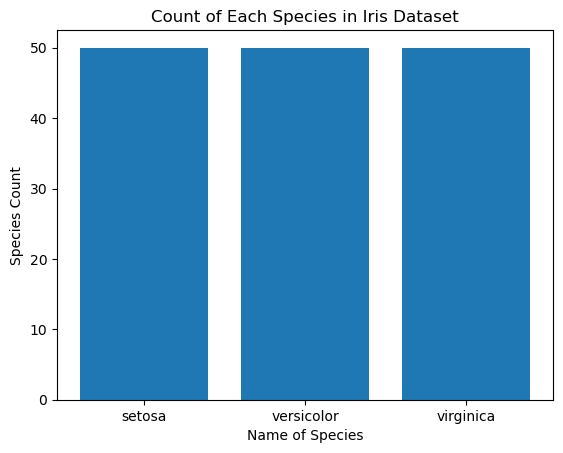

In [29]:
# Bar charts can be used to compare counts of specific observations, so I will employ this graph to compare the number of 
# each flower species within the DataFrame.

# The value_counts() function will be used here to extract the total number of each flower species.

species_counts = iris['Species'].value_counts()

# The graph is constructed here using Matplotlib and its customizable features. The bar() function denotes a bar chart.

plt.bar(species_counts.index, species_counts.values)
plt.title('Count of Each Species in Iris Dataset')
plt.xlabel('Name of Species')
plt.ylabel('Species Count')
plt.show()

### Graph 2: Scatter Plot

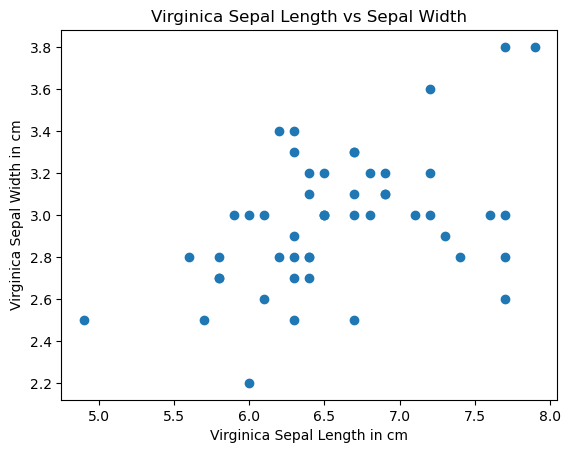

In [30]:
# A scatter plot is used to compare observations against one another to observe spread over a plane of space. I will be 
# using this visualization to see the sepal length of the virginica plant against its own sepal width. With some indexing, I
# have managed to extract these observations to plot them via the scatter() function. 

plt.scatter(iris[iris['Species'] == 'virginica']['sepal length (cm)'],
            iris[iris['Species'] == 'virginica']['sepal width (cm)'])
plt.title('Virginica Sepal Length vs Sepal Width')
plt.xlabel('Virginica Sepal Length in cm')
plt.ylabel('Virginica Sepal Width in cm')
plt.show()

### Graph 3: Pie Chart

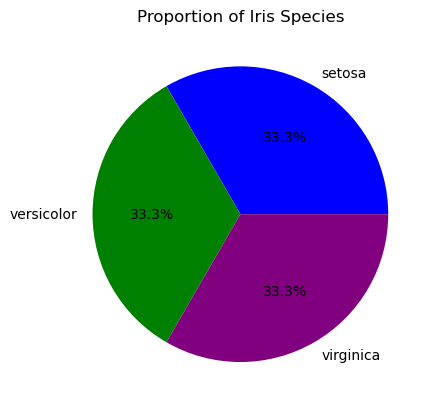

In [31]:
# A pie chart is good for seeing a portion of observations relative to the whole DataFrame. I will take this chart and use 
# it to visualize the proportion of each species' observations as they relate to the entirety of the dataset. Using only the
# index() function on the species_counts variable and the pie() function, I can create the pie chart. For a litle 
# customization, I have added colors to each portion of the whole as well as percentages specific to each portion.

plt.pie(species_counts, labels = species_counts.index, autopct='%1.1f%%', colors = ['blue', 'green', 'purple'])
plt.title('Proportion of Iris Species')
plt.show()